#Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

# Basic Information from the dataset

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


# EDA on the dataset

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


We can drop the first three columns : RowNUmber, CustomerId, Surname

In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Number of unique values in each feature

In [ ]:
df.nunique()

,0
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4
HasCrCard,2
IsActiveMember,2
EstimatedSalary,9999


In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
df.groupby('Exited').mean(numeric_only = True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


#Visualization

<Axes: ylabel='count'>

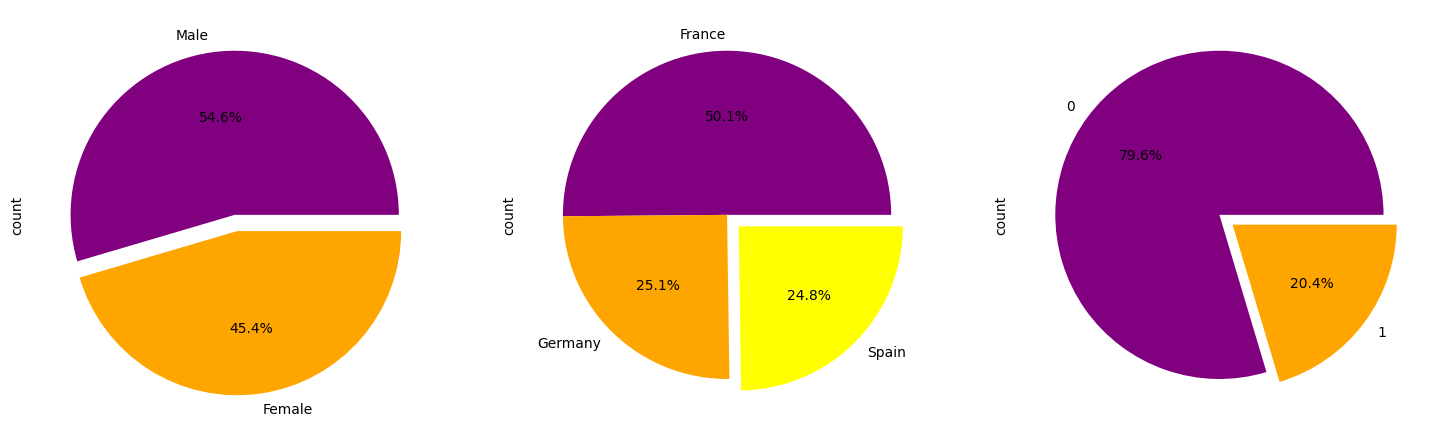

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (18,6))

plt.subplot(131)
df['Gender'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['purple', 'orange'], explode = [0, 0.1])

plt.subplot(132)
df['Geography'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['purple', 'orange', 'yellow'], explode = [0, 0, 0.1])

plt.subplot(133)
df['Exited'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['purple', 'orange'], explode = [0, 0.1])


<Axes: ylabel='count'>

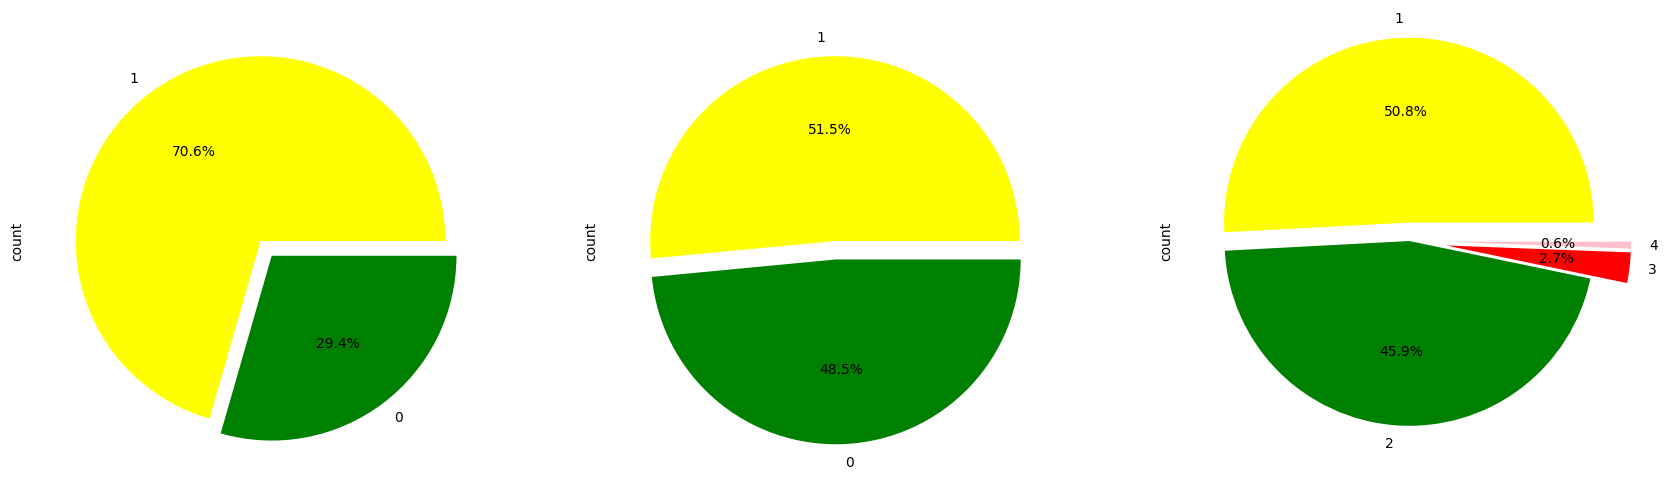

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (21, 6))

plt.subplot(131)
df['HasCrCard'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['yellow', 'green'], explode = [0, 0.1])

plt.subplot(132)
df['IsActiveMember'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['yellow', 'green'], explode = [0, 0.1])

plt.subplot(133)
df['NumOfProducts'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['yellow', 'green', 'red', 'pink'], explode = [0.1, 0, 0.2, 0.2])

<Axes: xlabel='Tenure', ylabel='Count'>

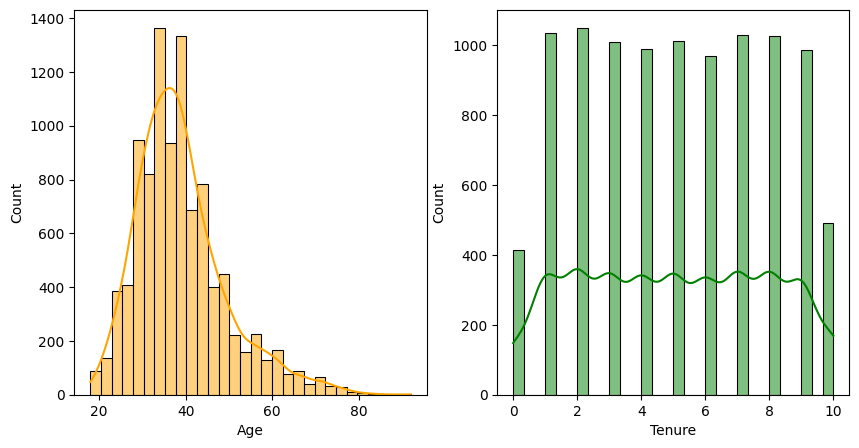

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))

plt.subplot(121)
sns.histplot(data = df, x = 'Age', bins = 30, kde = True, color = 'orange')

plt.subplot(122)
sns.histplot(data = df, x = 'Tenure', bins = 30, kde = True, color = 'green')

In [ ]:
df[['Age', 'Tenure']].describe().drop('count', axis = 0)

,Age,Tenure
mean,38.921800,5.012800
std,10.487806,2.892174
min,18.000000,0.000000
25%,32.000000,3.000000
50%,37.000000,5.000000
75%,44.000000,7.000000
max,92.000000,10.000000


<Axes: xlabel='CreditScore', ylabel='Count'>

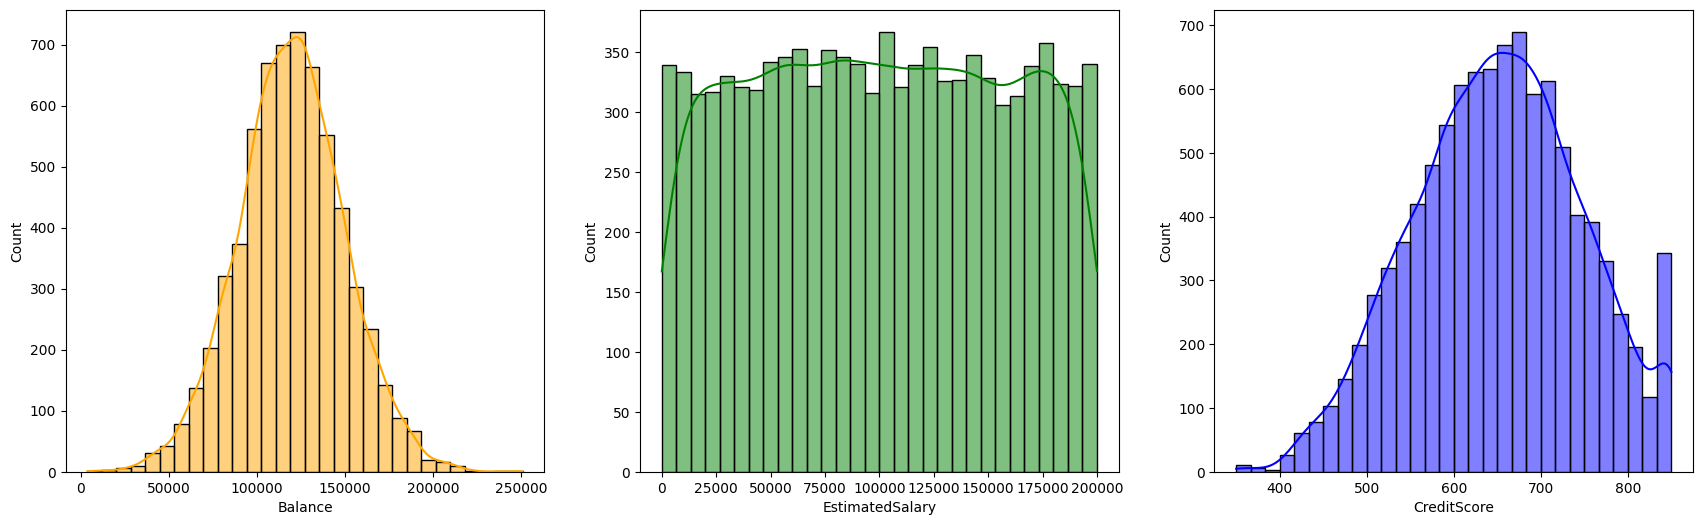

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (21,6))

plt.subplot(131)
sns.histplot(df[df['Balance'] != 0]['Balance'], bins = 30, kde = True, color = 'orange')

plt.subplot(132)
sns.histplot(data = df, x = 'EstimatedSalary', bins = 30, kde = True, color = 'green')

plt.subplot(133)
sns.histplot(data = df, x = 'CreditScore', bins = 30, kde = True, color = 'blue')

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<ipython-input-22-0a6df87960a0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='CreditScore', y='Geography', inner='box', palette='Dark2')


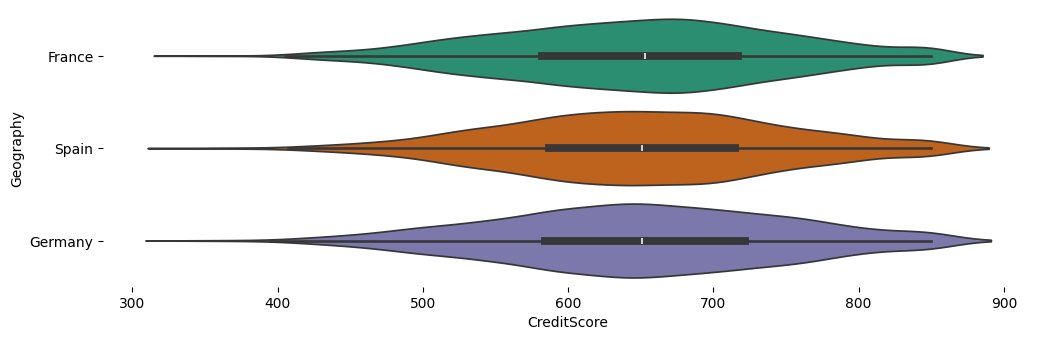

In [ ]:
# @title Geography vs CreditScore

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Geography'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='CreditScore', y='Geography', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

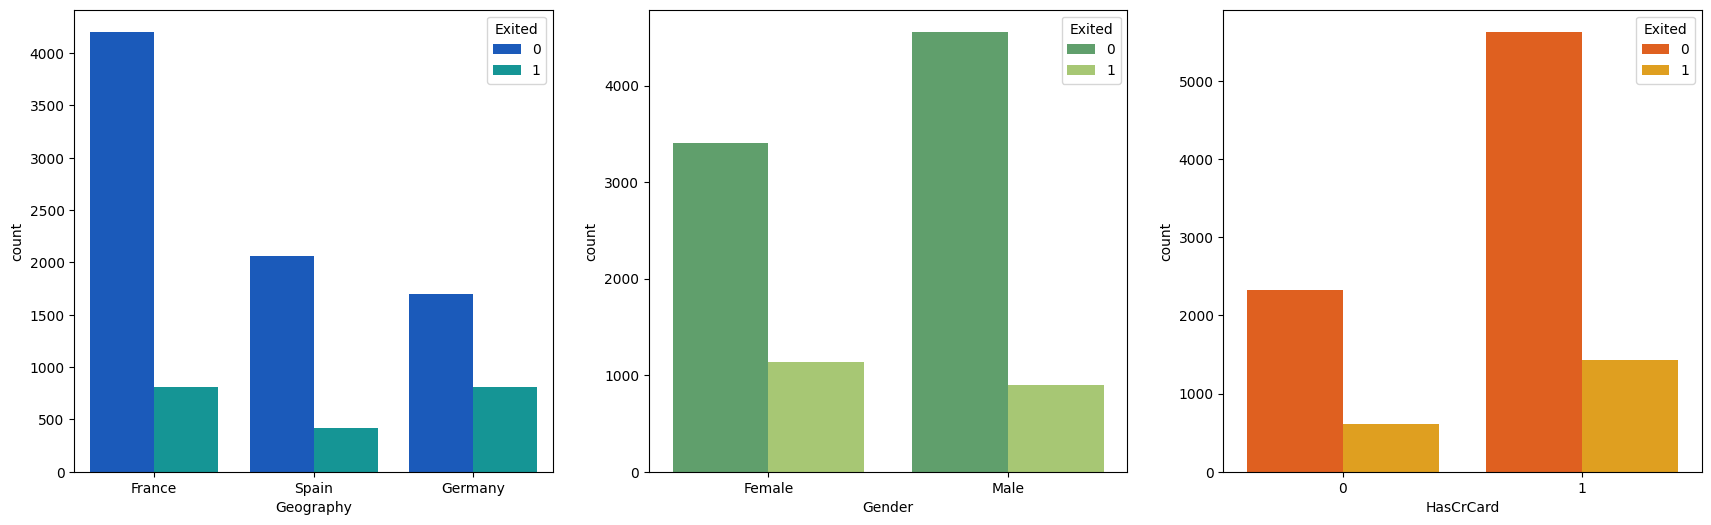

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (21,6))

plt.subplot(131)
sns.countplot(data=df, x='Geography', hue='Exited', palette = 'winter')

plt.subplot(132)
sns.countplot(data = df, x = 'Gender', hue = 'Exited', palette = 'summer')

plt.subplot(133)
sns.countplot(data = df, x = 'HasCrCard', hue = 'Exited', palette = 'autumn')


plt.show()

<ipython-input-24-159d22654887>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x = 'CreditScore', y = 'Geography', inner = 'box', palette = 'winter')


<Axes: xlabel='CreditScore', ylabel='Geography'>

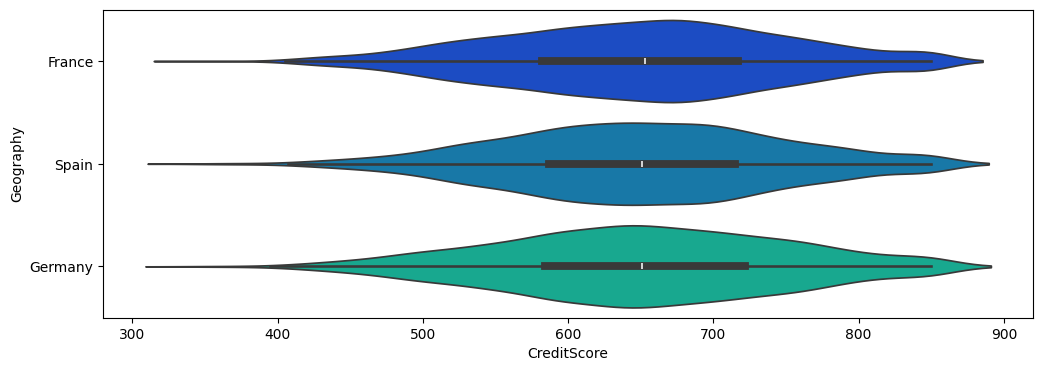

In [ ]:
plt.figure(figsize = (12, 4))
sns.violinplot(data = df, x = 'CreditScore', y = 'Geography', inner = 'box', palette = 'winter')

<ipython-input-25-48923b068b60>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x = 'CreditScore', y = 'Gender', inner = 'box', palette = 'summer')


<Axes: xlabel='CreditScore', ylabel='Gender'>

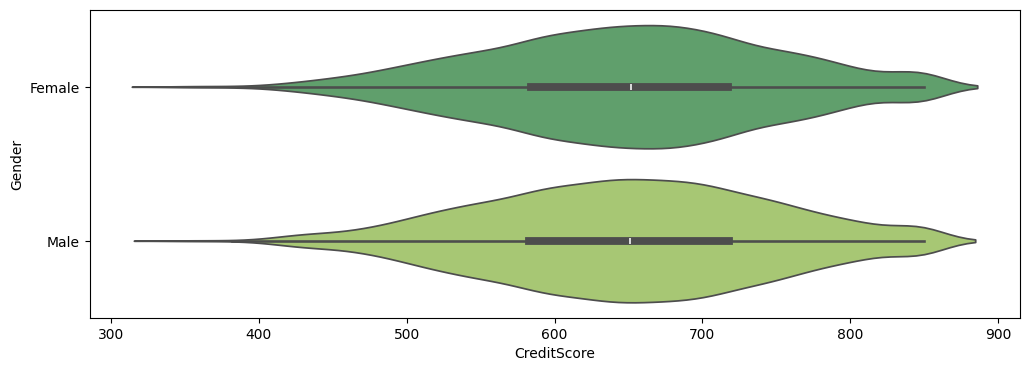

In [ ]:
plt.figure(figsize = (12,4))
sns.violinplot(data = df, x = 'CreditScore', y = 'Gender', inner = 'box', palette = 'summer')

#Feature Engineering

Encoding the categorical data

In [ ]:
df.dtypes[df.dtypes == 'object'].index

Index(['Geography', 'Gender'], dtype='object')

In [ ]:
df[['Geography', 'Gender']].nunique()

,0
Geography,3
Gender,2


In [ ]:
#One-hot encoding
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
x = df.drop(['Exited'], axis = 1)
y = df['Exited']

In [ ]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [ ]:
x.shape, y.shape

((10000, 11), (10000,))

Train test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

Standard scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

# ANN

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
ann = Sequential()

In [52]:
ann.add(Dense(units = 11, activation = 'relu', input_dim = 11))
ann.add(Dense(units = 11, activation = 'relu'))
ann.add(Dense(units = 1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [54]:
history = ann.fit(x_train, y_train, batch_size = 32, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7986 - loss: 0.6291 - val_accuracy: 0.7975 - val_loss: 0.5085
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7939 - loss: 0.5114 - val_accuracy: 0.7975 - val_loss: 0.5047
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7980 - loss: 0.5039 - val_accuracy: 0.7975 - val_loss: 0.5041
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7933 - loss: 0.5095 - val_accuracy: 0.7975 - val_loss: 0.4922
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7866 - loss: 0.5004 - val_accuracy: 0.7975 - val_loss: 0.4706
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7957 - loss: 0.4670 - val_accuracy: 0.7975 - val_loss: 0.4585
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7967 - loss: 0.4537 - val_accuracy: 0.7975 - val_loss: 0.4524
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8005 - loss: 0.4419 - val_accu

In [57]:
ann.layers[0].get_weights()

[array([[-0.09366488,  0.02631764,  0.09543688, -0.34380302, -0.59391475,
         -0.3120493 ,  0.03454401, -0.01647639,  0.14579095,  0.2316525 ,
          0.13636105],
        [-1.1811936 ,  2.2742655 , -1.0546566 ,  1.6865249 , -2.0142632 ,
          1.7995372 ,  0.44174576, -1.533337  , -1.7315382 , -0.98661023,
         -1.2811944 ],
        [ 0.02415356,  0.24244444, -0.22186302, -0.01473616,  0.24158522,
         -0.14209254,  0.1643394 ,  0.0286161 ,  0.01567254,  0.41018423,
         -0.14681543],
        [ 0.17614128, -0.00884178, -0.5131056 ,  0.6766047 , -1.2286671 ,
          0.12412373, -0.3337952 , -1.5290368 , -1.0429618 , -1.2354854 ,
         -0.25202075],
        [-2.7913916 ,  1.1084266 , -2.6338212 ,  0.74135774, -0.69253856,
          2.4994092 , -0.8300909 , -1.8198534 , -0.7639249 , -1.8465261 ,
         -3.3371453 ],
        [-0.69702584,  0.1038154 ,  0.0947914 ,  0.21976446,  0.4623575 ,
         -0.07910603,  0.08910903, -0.11851632, -0.2171097 ,  0.0200554

In [67]:
y_pred = ann.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [59]:
y_pred

array([[0.04825058],
       [0.092411  ],
       [0.06738383],
       ...,
       [0.03445116],
       [0.05154943],
       [0.40313905]], dtype=float32)

In [66]:
y_pred = y_pred.argmax(axis=-1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

InvalidParameterError: The 'y_pred' parameter of accuracy_score must be an array-like or a sparse matrix. Got 0 instead.

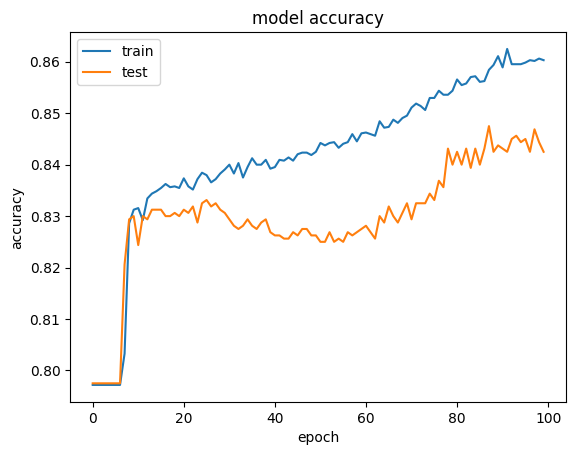

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

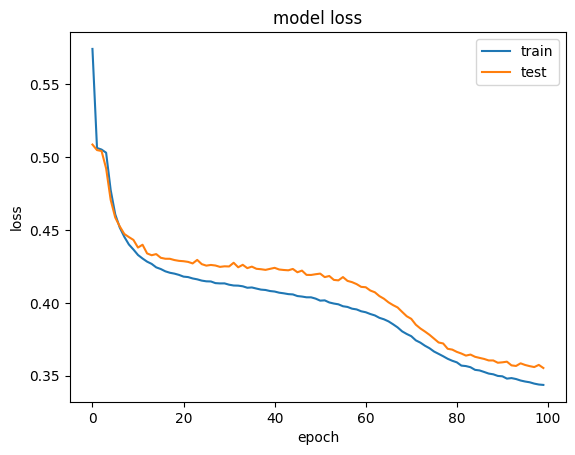

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')